# Assignment 2: Markov Decision Processes

## Introduction

This assignment will review the two classic methods for solving Markov Decision Processes (MDPs) with finite state and action spaces. We will implement value iteration (VI) and policy iteration (PI) for a finite MDP, both of which find the optimal policy in a finite number of iterations.
The experiments here will use the Frozen Lake environment, a simple gridworld MDP that is taken from gym and slightly modified for this assignment. In this MDP, the agent must navigate from the start state to the goal state on a 4x4 grid, with stochastic transitions.

In [1]:
using Seaborn
include("frozen_lake.jl")
srand(123)
env = FrozenLake()

println(describe(env))

INFO: Installing PyQt5 via Anaconda's /home/cano/anaconda2/bin/conda...


Fetching package metadata .........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /home/cano/anaconda2:
#
pyqt                      4.11.4                   py27_4  


In [2]:
s = getInitialState(env)
for t=1:100
    render_env(env)
    a = sample(env)
    s, r = transfer(env, s, a)
    if isTerminal(s, env); break; end
end
render_env(env)


SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG


PyObject <open file '<stdout>', mode 'w' at 0x7fa7f36d6150>

In [3]:
Vs = Any[]
π, V = synchronous_value_iteration(env; Ɣ=0.95, verbose=false, Vs=Vs);
#println(prettyprint(π))

Number of iterations: 59


In [4]:
function getvalues(Vs, s)
    vals = Array{Float64, 1}();
    for VD in Vs; push!(vals, VD[s]); end;
    return vals
end

getvalues (generic function with 1 method)

In [5]:
vals = zeros(Float64, 1, length(Vs), 16);
for i=0:15
    vals[1, :, i+1] = getvalues(Vs, FLState(i, false));
end

println("Values of different states: ")

Values of different states: 


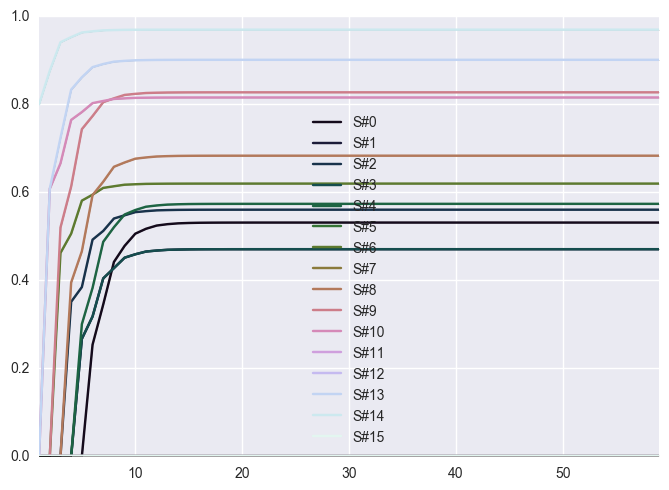

In [6]:
tsplot(vals; time=collect(1:length(Vs)), condition=map(x->string("S#", x), collect(0:15)), color="cubehelix");

In [7]:
for (k,v) in V; println(string(k, " => ", v)); end

FLState(2,false) => 0.5604320864107626
FLState(11,false) => 0.0
FLState(0,false) => 0.5311849321048031
FLState(7,false) => 0.0
FLState(9,false) => 0.8271762039788609
FLState(10,false) => 0.8154616644297341
FLState(8,false) => 0.6831553711535309
FLState(6,false) => 0.6197508649665979
FLState(4,false) => 0.57369953820628
FLState(3,false) => 0.4706391001902537
FLState(5,false) => 0.0
FLState(13,false) => 0.9010626126295405
FLState(14,false) => 0.9695788487522925
FLState(15,false) => 0.0
FLState(12,false) => 0.0
FLState(1,false) => 0.4706391001902537


In [8]:
Vs2 = Any[]
Ps = Any[]
π, V2 = policy_iteration(env::AbsEnvironment; Ɣ=0.95, verbose=false, Vs=Vs2, Ps=Ps);
#println(prettyprint(π))

Number of iterations: 5


In [9]:
println(prettyprint(Policy(Ps[5])))

FLState(2,false) => Tuple{ReinforcementLearning.AbsAction,Float64}[(FLAction(1),1.0)]
FLState(11,false) => Tuple{ReinforcementLearning.AbsAction,Float64}[(FLAction(0),1.0)]
FLState(0,false) => Tuple{ReinforcementLearning.AbsAction,Float64}[(FLAction(1),1.0)]
FLState(7,false) => Tuple{ReinforcementLearning.AbsAction,Float64}[(FLAction(0),1.0)]
FLState(9,false) => Tuple{ReinforcementLearning.AbsAction,Float64}[(FLAction(1),1.0)]
FLState(10,false) => Tuple{ReinforcementLearning.AbsAction,Float64}[(FLAction(1),1.0)]
FLState(8,false) => Tuple{ReinforcementLearning.AbsAction,Float64}[(FLAction(2),1.0)]
FLState(6,false) => Tuple{ReinforcementLearning.AbsAction,Float64}[(FLAction(1),1.0)]
FLState(4,false) => Tuple{ReinforcementLearning.AbsAction,Float64}[(FLAction(1),1.0)]
FLState(3,false) => Tuple{ReinforcementLearning.AbsAction,Float64}[(FLAction(0),1.0)]
FLState(5,false) => Tuple{ReinforcementLearning.AbsAction,Float64}[(FLAction(0),1.0)]
FLState(13,false) => Tuple{ReinforcementLearning.Abs

In [10]:
for (k,v) in V2; println(string(k, " => ", v)); end

FLState(2,false) => 0.5604320864107626
FLState(11,false) => 0.0
FLState(0,false) => 0.5311849321048031
FLState(7,false) => 0.0
FLState(9,false) => 0.8271762039788609
FLState(10,false) => 0.8154616644297341
FLState(8,false) => 0.6831553711535309
FLState(6,false) => 0.6197508649665979
FLState(4,false) => 0.57369953820628
FLState(3,false) => 0.4706391001902537
FLState(5,false) => 0.0
FLState(13,false) => 0.9010626126295405
FLState(14,false) => 0.9695788487522925
FLState(15,false) => 0.0
FLState(12,false) => 0.0
FLState(1,false) => 0.4706391001902537


In [11]:
vals2 = zeros(Float64, 1, length(Vs2), 16);
for i=0:15
    vals2[1, :, i+1] = getvalues(Vs2, FLState(i, false));
end

println("Values of different states: ")

Values of different states: 


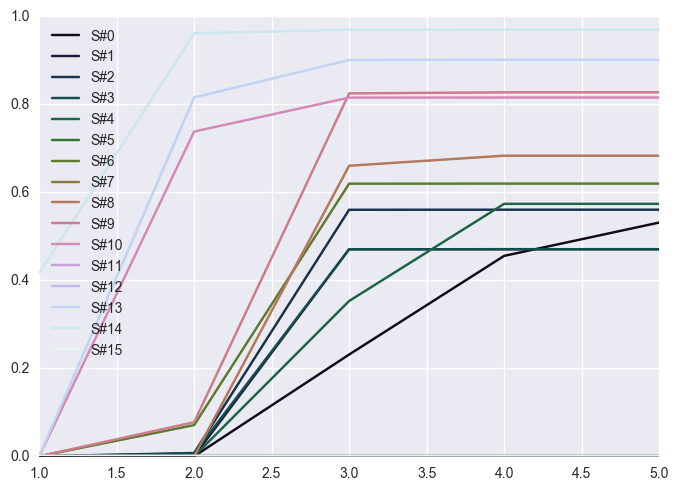

In [12]:
tsplot(vals2, collect(1:length(Vs2)); condition=map(x->string("S#", x), collect(0:15)), color="cubehelix");

Now we can compare the convergence of value iteration and policy iteration on several states. For fun, you can try adding modified policy iteration.

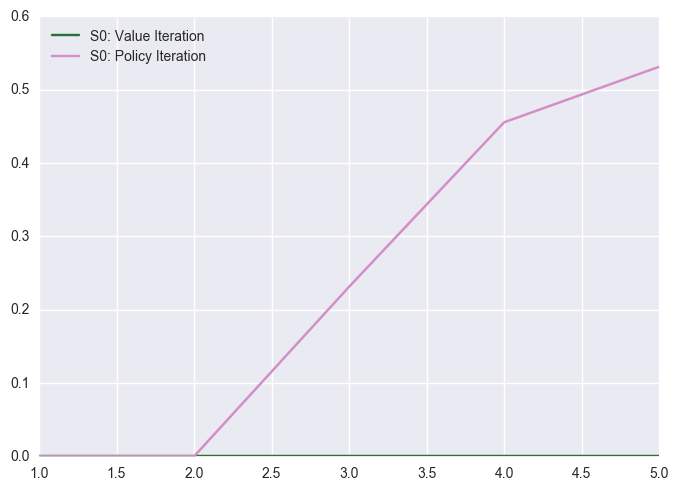

In [13]:
v0 = zeros(Float64, 1, 5, 2);
v0[1, :, 1] = vals[1, 1:5, 1];
v0[1, :, 2] = vals2[1, 1:5, 1];
tsplot(v0; time=collect(1:5), condition=["S0: Value Iteration", "S0: Policy Iteration"], color="cubehelix");

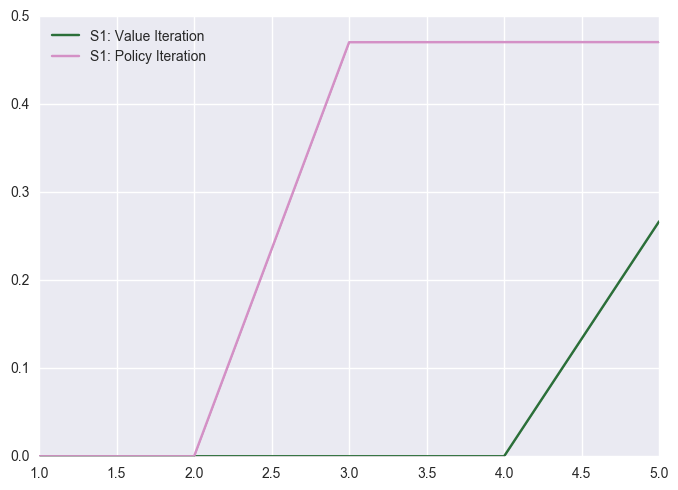

In [14]:
v1 = zeros(Float64, 1, 5, 2);
v1[1, :, 1] = vals[1, 1:5, 2];
v1[1, :, 2] = vals2[1, 1:5, 2];
tsplot(v1; time=collect(1:5), condition=["S1: Value Iteration", "S1: Policy Iteration"], color="cubehelix");

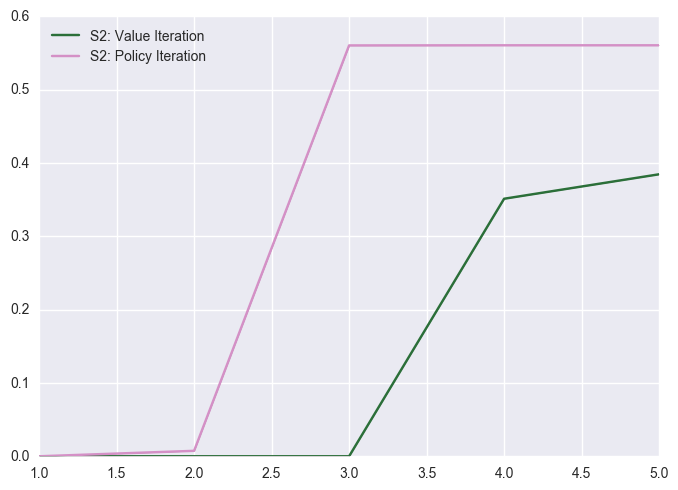

In [15]:
v2 = zeros(Float64, 1, 5, 2);
v2[1, :, 1] = vals[1, 1:5, 3];
v2[1, :, 2] = vals2[1, 1:5, 3];
tsplot(v2; time=collect(1:5), condition=["S2: Value Iteration", "S2: Policy Iteration"], color="cubehelix");

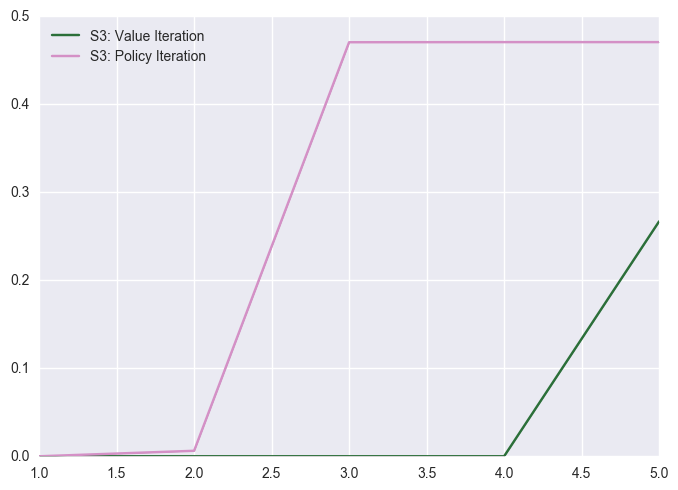

In [18]:
v3 = zeros(Float64, 1, 5, 2);
v3[1, :, 1] = vals[1, 1:5, 4];
v3[1, :, 2] = vals2[1, 1:5, 4];
tsplot(v3; time=collect(1:5), condition=["S3: Value Iteration", "S3: Policy Iteration"], color="cubehelix");

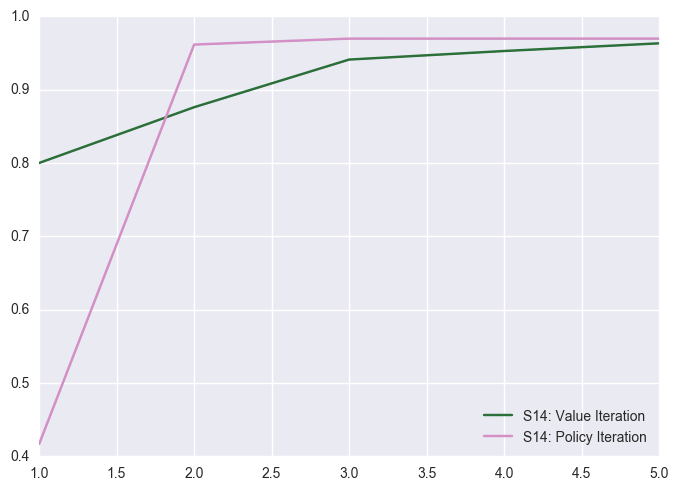

In [19]:
v14 = zeros(Float64, 1, 5, 2);
v14[1, :, 1] = vals[1, 1:5, 15];
v14[1, :, 2] = vals2[1, 1:5, 15];
tsplot(v14; time=collect(1:5), condition=["S14: Value Iteration", "S14: Policy Iteration"], color="cubehelix");